# Multiple Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("50_Startups.csv")

In [3]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
df.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [5]:
df.shape

(50, 5)

In [6]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [8]:
df.isnull().sum()  # No null nalues in the data set

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [9]:
x = df.drop(df[["Profit"]],axis = 1)
x.head()

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,New York
1,162597.70,151377.59,443898.53,California
2,153441.51,101145.55,407934.54,Florida
3,144372.41,118671.85,383199.62,New York
4,142107.34,91391.77,366168.42,Florida


In [10]:
y = df["Profit"]
y.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64

In [11]:
df["State"].value_counts()

California    17
New York      17
Florida       16
Name: State, dtype: int64

In [12]:
df.groupby(["State"]).mean()

,R&D Spend,Administration,Marketing Spend,Profit
State,,,,
California,64657.674118,120746.507059,182540.929412,103905.175294
Florida,80724.016250,121768.897500,247323.551250,118774.024375
New York,76195.062353,121543.470588,205346.015882,113756.446471


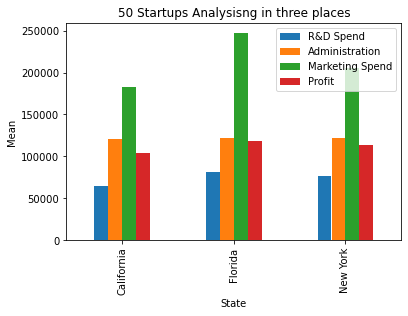

In [13]:
df.groupby(["State"]).mean().plot(kind = "bar")
plt.ylabel("Mean")
plt.title("50 Startups Analysisng in three places")
plt.show()

In [14]:
df.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


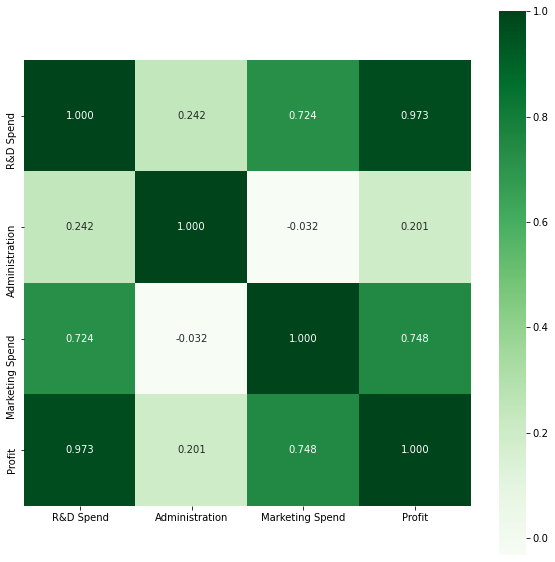

In [15]:
plt.figure(figsize = (10,10))
sns.heatmap(df.corr(),annot =True,fmt = ".3f",square = True,cmap = "Greens")
plt.show()

In [16]:
dummies = pd.get_dummies(df["State"])
dummies.head()

,California,Florida,New York
0,0,0,1
1,1,0,0
2,0,1,0
3,0,0,1
4,0,1,0


In [17]:
df_2 = pd.concat([df,dummies],axis = 1)
df_2.head()

,R&D Spend,Administration,Marketing Spend,State,Profit,California,Florida,New York
0,165349.20,136897.80,471784.10,New York,192261.83,0,0,1
1,162597.70,151377.59,443898.53,California,191792.06,1,0,0
2,153441.51,101145.55,407934.54,Florida,191050.39,0,1,0
3,144372.41,118671.85,383199.62,New York,182901.99,0,0,1
4,142107.34,91391.77,366168.42,Florida,166187.94,0,1,0


In [18]:
Final = df_2.drop(["State","Florida"],axis = 1)
Final.head()

,R&D Spend,Administration,Marketing Spend,Profit,California,New York
0,165349.20,136897.80,471784.10,192261.83,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0
2,153441.51,101145.55,407934.54,191050.39,0,0
3,144372.41,118671.85,383199.62,182901.99,0,1
4,142107.34,91391.77,366168.42,166187.94,0,0


In [19]:
x = Final.drop(["Profit"],axis = 1)
x.head()

,R&D Spend,Administration,Marketing Spend,California,New York
0,165349.20,136897.80,471784.10,0,1
1,162597.70,151377.59,443898.53,1,0
2,153441.51,101145.55,407934.54,0,0
3,144372.41,118671.85,383199.62,0,1
4,142107.34,91391.77,366168.42,0,0


In [20]:
y = Final["Profit"]
y.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64

In [21]:
model = LinearRegression()

In [22]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 1)

In [23]:
model.fit(x_train,y_train)

LinearRegression()

In [24]:
y_predict = model.predict(x_test)
y_predict

array([114664.41715865,  90593.15531622,  75692.84151574,  70221.88679653,
       179790.25514874, 171576.92018521,  49753.58752034, 102276.65888935,
        58649.37795758,  98272.0256113 ])

In [25]:
p = model.predict(x)
Final["Predict"] = p     # Creating New column
Final.head(10)

,R&D Spend,Administration,Marketing Spend,Profit,California,New York,Predict
0,165349.20,136897.80,471784.10,192261.83,0,1,190209.724825
1,162597.70,151377.59,443898.53,191792.06,1,0,186863.181545
2,153441.51,101145.55,407934.54,191050.39,0,0,179790.255149
3,144372.41,118671.85,383199.62,182901.99,0,1,171576.920185
4,142107.34,91391.77,366168.42,166187.94,0,0,169898.036352
5,131876.90,99814.71,362861.36,156991.12,0,1,161491.053888
6,134615.46,147198.87,127716.82,156122.51,1,0,156091.376405
7,130298.13,145530.06,323876.68,155752.60,0,0,159019.396773
8,120542.52,148718.95,311613.29,152211.77,0,1,150770.521978
9,123334.88,108679.17,304981.62,149759.96,1,0,152846.315963


In [26]:
from sklearn.metrics import r2_score,mean_squared_error
print("Accuracy :", r2_score(y_test,y_predict))
print("Mean Squared Error :", mean_squared_error(y_test,y_predict))

Accuracy : 0.9649618042060885
Mean Squared Error : 79495441.50401539
